# Car Evaluation Data

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the dataset into Pandas Dataframe
df=pd.read_csv(r"C:\Users\PRAVEENA PRAKASH\cars_data.csv")

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.shape

(11914, 16)

In [6]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

## Data Schema

* Make: Car manufacturer/brand
* Model: Specific car model name
* Year: Manufacturing year of the vehicle
* Engine Fuel Type: Type of fuel required by the engine
* Engine HP: Engine horsepower rating
* Engine Cylinders: Number of cylinders in the engine
* Transmission Type: Type of transmission system
* Driven_Wheels: Wheel drive configuration
* Number of Doors: Total number of doors on the vehicle
* Market Category: Target market segment or category
* Vehicle Size: Size classification of the vehicle
* Vehicle Style: Body style or design type
* highway MPG: Fuel efficiency rating for highway driving in miles per gallon
* city mpg: Fuel efficiency rating for city driving in miles per gallon
* Popularity: Popularity score or rating of the vehicle
* MSRP: Manufacturer's Suggested Retail Price in dollars

In [7]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## Data Cleaning

In [8]:
# Check about missing values to decide whether need to make any data cleaning or not
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [13]:
# Find rows where Engine Fuel Type is null
null_engine_fuel_rows = df[df['Engine Fuel Type'].isnull()]
print(null_engine_fuel_rows)

         Make   Model  Year Engine Fuel Type  Engine HP  Engine Cylinders  \
11321  Suzuki  Verona  2004              NaN      155.0               6.0   
11322  Suzuki  Verona  2004              NaN      155.0               6.0   
11323  Suzuki  Verona  2004              NaN      155.0               6.0   

      Transmission Type      Driven_Wheels  Number of Doors Market Category  \
11321         AUTOMATIC  front wheel drive              4.0             NaN   
11322         AUTOMATIC  front wheel drive              4.0             NaN   
11323         AUTOMATIC  front wheel drive              4.0             NaN   

      Vehicle Size Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
11321      Midsize         Sedan           25        17         481  17199  
11322      Midsize         Sedan           25        17         481  20199  
11323      Midsize         Sedan           25        17         481  18499  


In [14]:
df['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [15]:
# The 2004 Suzuki Verona runs on regular unleaded gasoline, so that we can update the null values of column 'Engine Fuel Type'  with 'regular unleaded'
df['Engine Fuel Type'].fillna('regular unleaded', inplace=True)
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [20]:
# Find unique rows of columns make, model and year where Engine HP is null
unique_null_engine_hp_rows = df[df['Engine HP'].isnull()][['Make', 'Model', 'Year']].drop_duplicates()
unique_null_engine_hp_rows

,Make,Model,Year
539,FIAT,500e,2015
540,FIAT,500e,2016
541,FIAT,500e,2017
2905,Lincoln,Continental,2017
4203,Ford,Escape,2017
4705,Honda,Fit EV,2013
4706,Honda,Fit EV,2014
4785,Ford,Focus,2015
4789,Ford,Focus,2016
4798,Ford,Focus,2017


In [22]:
# Create a dictionary mapping (Make, Year) to HP values
hp_mapping = {
    ('FIAT', 2015): 111,
    ('FIAT', 2016): 111,
    ('FIAT', 2017): 111,
    ('Lincoln', 2017): 305,
    ('Ford', 2017): 168,
    ('Honda', 2013): 123,
    ('Honda', 2014): 123,
    ('Ford', 2015): 160,
    ('Ford', 2016): 160,
    ('Ford', 2005): 193,
    ('Mitsubishi', 2014): 66,
    ('Chevrolet', 2015): 195,
    ('Chevrolet', 2016): 196,
    ('Chevrolet', 2017): 197,
    ('Nissan', 2014): 107,
    ('Nissan', 2015): 107,
    ('Nissan', 2016): 107,
    ('Mercedes-Benz', 2015): 200,
    ('Tesla', 2014): 302,
    ('Tesla', 2015): 329,
    ('Tesla', 2016): 315,
    ('Toyota', 2013): 154,
    ('Toyota', 2014): 154,
    ('Kia', 2015): 109,
    ('Kia', 2016): 109
}

# Function to fill HP values based on Make and Year
def fill_hp(row):
    if pd.isna(row['Engine HP']):
        key = (row['Make'], row['Year'])
        return hp_mapping.get(key, row['Engine HP'])
    return row['Engine HP']

# Apply the function to fill null HP values
df['Engine HP'] = df.apply(fill_hp, axis=1)

In [29]:
# Find unique rows of columns where Engine HP is null
unique_null_engine_cylinders_rows = df[df['Engine Cylinders'].isnull()].drop_duplicates()
unique_null_engine_cylinders_rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,28995
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35595
5778,Mitsubishi,i-MiEV,2014,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,102,121,436,22995
8373,Toyota,RAV4 EV,2012,electric,154.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Crossover,Midsize,4dr SUV,74,78,2031,49800


In [30]:
# These car models have no Engine Cylinders, so that we can replace the null values with 0
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(0)

In [32]:
# Find unique rows of columns where Number of Doors is null
unique_null_Number_of_Doors_rows = df[df['Number of Doors'].isnull()].drop_duplicates()
unique_null_Number_of_Doors_rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
6930,Tesla,Model S,2016,electric,315.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,79500
6931,Tesla,Model S,2016,electric,315.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,101,98,1391,66000
6932,Tesla,Model S,2016,electric,315.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,High-Performance",Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,315.0,0.0,DIRECT_DRIVE,rear wheel drive,NaN,"Exotic,Performance",Large,Sedan,100,97,1391,74500
6934,Tesla,Model S,2016,electric,315.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,107,101,1391,71000


In [34]:
# The 2013 Ferrari FF has 2 doors and The 2016 Tesla Model S has 5 doors. So we can update the null values
df.loc[(df['Make'] == 'Ferrari') & (df['Model'] == 'FF') & (df['Year'] == 2013) & (df['Number of Doors'].isnull()), 'Number of Doors'] = 2
df.loc[(df['Make'] == 'Tesla') & (df['Model'] == 'Model S') & (df['Year'] == 2016) & (df['Number of Doors'].isnull()), 'Number of Doors'] = 5

In [44]:
# Find unique rows of columns make, model and year where Market Category is null
unique_null_Market_Category_rows = df[df['Market Category'].isnull()][['Make', 'Model', 'Year']].drop_duplicates()
unique_null_Market_Category_rows.head(50)

,Make,Model,Year
87,Nissan,200SX,1996
91,Nissan,200SX,1997
93,Nissan,200SX,1998
203,Chrysler,300,2015
211,Chrysler,300,2016
223,Chrysler,300,2017
360,Mazda,3,2015
380,Mazda,3,2016
398,Mazda,3,2017
479,Toyota,4Runner,2014


In [36]:
df['Market Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

In [45]:
# Create a mapping dictionary for Market Category based on Make and Model
market_category_mapping = {
    ('Nissan', '200SX'): 'Hatchback,Performance',
    ('Chrysler', '300'): 'Luxury,Performance',
    ('Mazda', '3'): 'Hatchback,Luxury,Performance',
    ('Toyota', '4Runner'): 'Crossover,Performance',
    ('FIAT', '500'): 'Hatchback,Flex Fuel',
    ('FIAT', '500L'): 'Hatchback,Luxury',
    ('Mazda', '5'): 'Crossover,Hatchback',
    ('Pontiac', '6000'): 'Sedan,Flex Fuel',
    ('Mazda', '626'): 'Sedan,Performance',
    ('Mazda', '6'): 'Performance,Hybrid',
    ('Mazda', '929'): 'Luxury',
    ('Hyundai', 'Accent'): 'Hatchback,Flex Fuel',
    ('Plymouth', 'Acclaim'): 'Sedan,Flex Fuel',
    ('Honda', 'Accord'): 'Luxury,Hybrid',
    ('Oldsmobile', 'Achieva'): 'Sedan,Performance',
    ('Suzuki', 'Aerio'): 'Hatchback,Performance',
    ('Ford', 'Aerostar'): 'Crossover,Flex Fuel'
}

# Fill null Market Category values based on Make and Model mapping
for (make, model), category in market_category_mapping.items():
    mask = (df['Make'] == make) & (df['Model'] == model) & (df['Market Category'].isnull())
    df.loc[mask, 'Market Category'] = category

In [49]:
# Find unique rows of columns make, model and year where Market Category is null
unique_null_Market_Category_rows = df[df['Market Category'].isnull()][['Make', 'Model', 'Year']].drop_duplicates()
unique_null_Market_Category_rows.head(60)

,Make,Model,Year
1343,Oldsmobile,Alero,2002
1351,Oldsmobile,Alero,2003
1359,Oldsmobile,Alero,2004
1402,Nissan,Altima,2015
1412,Nissan,Altima,2016
1419,Nissan,Altima,2017
1426,Kia,Amanti,2007
1427,Kia,Amanti,2008
1428,Kia,Amanti,2009
1438,Nissan,Armada,2015


In [50]:
# Create a dictionary mapping (Make, Model) to Market Category
market_category_mapping = {
    ('Oldsmobile', 'Alero'): 'Performance',
    ('Nissan', 'Altima'): 'Luxury,Hybrid',
    ('Kia', 'Amanti'): 'Luxury',
    ('Nissan', 'Armada'): 'Crossover,Performance',
    ('Chrysler', 'Aspen'): 'Crossover,Luxury',
    ('Chevrolet', 'Astro Cargo'): 'Crossover,Flex Fuel',
    ('Chevrolet', 'Astro'): 'Crossover,Flex Fuel',
    ('Oldsmobile', 'Aurora'): 'Luxury',
    ('Toyota', 'Avalon'): 'Luxury,Hybrid',
    ('Dodge', 'Avenger'): 'Performance',
    ('Chevrolet', 'Aveo'): 'Hatchback,Flex Fuel',
    ('Nissan', 'Axxess'): 'Crossover,Hatchback',
    ('Mazda', 'B-Series Pickup'): 'Flex Fuel',
    ('Mazda', 'B-Series Truck'): 'Flex Fuel',
    ('Mazda', 'B-Series'): 'Flex Fuel',
    ('Volkswagen', 'Beetle Convertible'): 'Hatchback,Luxury,Performance',
    ('Chevrolet', 'Beretta'): 'Performance',
    ('Chevrolet', 'Blazer'): 'Crossover,Performance',
    ('Pontiac', 'Bonneville'): 'Luxury',
    ('Kia', 'Borrego'): 'Crossover,Flex Fuel',
    ('Oldsmobile', 'Bravada'): 'Crossover,Luxury',
    ('Plymouth', 'Breeze'): 'Flex Fuel',
    ('Ford', 'Bronco II'): 'Crossover,Performance',
    ('Ford', 'Bronco'): 'Crossover,Performance',
    ('Volkswagen', 'Cabriolet'): 'Hatchback,Luxury'
}

# Fill null Market Category values based on Make and Model
for index, row in df.iterrows():
    if pd.isna(row['Market Category']):
        make_model_key = (row['Make'], row['Model'])
        if make_model_key in market_category_mapping:
            df.at[index, 'Market Category'] = market_category_mapping[make_model_key]

# Check how many null values remain
print(f"Remaining null values in Market Category: {df['Market Category'].isnull().sum()}")

Remaining null values in Market Category: 2906


In [51]:
# Find unique rows of columns make, model and year where Market Category is null
unique_null_Market_Category_rows = df[df['Market Category'].isnull()][['Make', 'Model', 'Year']].drop_duplicates()
unique_null_Market_Category_rows.head(60)

,Make,Model,Year
2128,Volkswagen,Cabrio,2000
2130,Volkswagen,Cabrio,2001
2136,Volkswagen,Cabrio,2002
2150,Dodge,Caliber,2010
2158,Dodge,Caliber,2011
2163,Dodge,Caliber,2012
2180,Chevrolet,Camaro,2015
2212,Toyota,Camry Solara,2006
2222,Toyota,Camry Solara,2007
2233,Toyota,Camry Solara,2008


In [55]:
# Define a mapping dictionary for Market Category based on Make and Model combinations
market_category_mapping = {
    ('Volkswagen', 'New Beetle'): 'Hatchback,Luxury',
    ('Chrysler', 'New Yorker'): 'Luxury',
    ('Oldsmobile', 'Ninety-Eight'): 'Luxury',
    ('Nissan', 'NV200'): 'Crossover,Flex Fuel',
    ('Honda', 'Odyssey'): 'Crossover,Luxury',
    ('Kia', 'Optima'): 'Hybrid',
    ('Chrysler', 'Pacifica'): 'Crossover,Luxury',
    ('Buick', 'Park Avenue'): 'Luxury',
    ('Toyota', 'Paseo'): 'Hatchback,Performance',
    ('Volkswagen', 'Passat'): 'Luxury,Hybrid',
    ('Honda', 'Passport'): 'Crossover,Performance',
    ('Toyota', 'Pickup'): 'Flex Fuel',
    ('Toyota', 'Previa'): 'Crossover,Flex Fuel',
    ('Chevrolet', 'Prizm'): 'Flex Fuel',
    ('Mazda', 'Protege5'): 'Hatchback,Performance',
    ('Mazda', 'Protege'): 'Flex Fuel',
    ('Chrysler', 'PT Cruiser'): 'Hatchback,Luxury',
    ('Nissan', 'Pulsar'): 'Hatchback,Performance',
    ('Nissan', 'Quest'): 'Crossover,Flex Fuel',
    ('Mitsubishi', 'Raider'): 'Flex Fuel',
    ('Buick', 'Rainier'): 'Crossover,Luxury',
    ('GMC', 'Rally Wagon'): 'Crossover,Flex Fuel',
    ('Dodge', 'RAM 150'): 'Flex Fuel',
    ('Dodge', 'RAM 250'): 'Flex Fuel',
    ('Dodge', 'Ram 50 Pickup'): 'Flex Fuel',
    ('Dodge', 'Ram Cargo'): 'Crossover,Flex Fuel',
    ('Dodge', 'Ram Pickup 1500'): 'Flex Fuel',
    ('Dodge', 'Ram Van'): 'Crossover,Flex Fuel',
    ('Dodge', 'Ram Wagon'): 'Crossover,Flex Fuel',
    ('Dodge', 'Ramcharger'): 'Crossover,Performance',
    ('Ford', 'Ranger'): 'Flex Fuel',
    ('Buick', 'Reatta'): 'Hatchback,Luxury',
    ('Oldsmobile', 'Regency'): 'Luxury',
    ('Honda', 'Ridgeline'): 'Flex Fuel',
    ('Kia', 'Rio'): 'Hatchback,Flex Fuel',
    ('Buick', 'Riviera'): 'Luxury',
    ('Buick', 'Roadmaster'): 'Luxury',
    ('Kia', 'Rondo'): 'Crossover,Flex Fuel',
    ('Volkswagen', 'Routan'): 'Crossover,Flex Fuel',
    ('Chevrolet', 'S-10 Blazer'): 'Crossover,Flex Fuel',
    ('Chevrolet', 'S-10'): 'Flex Fuel',
    ('GMC', 'S-15 Jimmy'): 'Crossover,Flex Fuel',
    ('GMC', 'S-15'): 'Flex Fuel',
    ('GMC', 'Safari Cargo'): 'Crossover,Flex Fuel',
    ('GMC', 'Safari'): 'Crossover,Flex Fuel',
    ('Suzuki', 'Samurai'): 'Crossover,Performance',
    ('Hyundai', 'Scoupe'): 'Hatchback,Performance',
    ('Chrysler', 'Sebring'): 'Hatchback,Luxury',
    ('Kia', 'Sedona'): 'Crossover,Flex Fuel',
    ('Nissan', 'Sentra'): 'Hatchback,Flex Fuel',
    ('Kia', 'Sephia'): 'Flex Fuel',
    ('Toyota', 'Sequoia'): 'Crossover,Performance',
    ('Dodge', 'Shadow'): 'Performance',
    ('Suzuki', 'Sidekick'): 'Crossover,Performance',
    ('Toyota', 'Sienna'): 'Crossover,Luxury',
    ('GMC', 'Sierra 1500 Classic'): 'Flex Fuel',
    ('GMC', 'Sierra 1500'): 'Flex Fuel',
    ('GMC', 'Sierra 1500HD'): 'Flex Fuel',
    ('GMC', 'Sierra C3'): 'Flex Fuel',
    ('GMC', 'Sierra Classic 1500'): 'Flex Fuel',
    ('Mitsubishi', 'Sigma'): 'Luxury',
    ('Oldsmobile', 'Silhouette'): 'Crossover,Flex Fuel',
    ('Chevrolet', 'Silverado 1500 Classic'): 'Flex Fuel',
    ('Chevrolet', 'Silverado 1500'): 'Flex Fuel',
    ('Buick', 'Skylark'): 'Performance',
    ('Hyundai', 'Sonata'): 'Hybrid',
    ('Chevrolet', 'Sonic'): 'Hatchback,Flex Fuel',
    ('GMC', 'Sonoma'): 'Flex Fuel',
    ('Kia', 'Soul EV'): 'Hatchback,Flex Fuel',
    ('Kia', 'Soul'): 'Hatchback,Flex Fuel',
    ('Kia', 'Spectra'): 'Hatchback,Flex Fuel',
    ('Dodge', 'Spirit'): 'Performance',
    ('Chevrolet', 'Sportvan'): 'Crossover,Flex Fuel'
}

# Fill null values in Market Category based on Make and Model
for (make, model), category in market_category_mapping.items():
    mask = (df['Make'] == make) & (df['Model'] == model) & (df['Market Category'].isnull())
    df.loc[mask, 'Market Category'] = category

# Check how many null values remain
print(f"Remaining null values in Market Category: {df['Market Category'].isnull().sum()}")

Remaining null values in Market Category: 1767


In [53]:
# Find unique rows of columns make, model and year where Market Category is null
unique_null_Market_Category_rows = df[df['Market Category'].isnull()][['Make', 'Model', 'Year']].drop_duplicates()
# Save the DataFrame to a CSV file
unique_null_Market_Category_rows.to_csv('unique_null_market_category_rows.csv', index=False)
print("CSV file saved successfully!")

CSV file saved successfully!


In [56]:
# Define a mapping dictionary for Market Category based on Make and Model combinations
market_category_mapping = {
    ('Chevrolet', 'Colorado'): 'Flex Fuel',
    ('Dodge', 'Colt'): 'Performance',
    ('Plymouth', 'Colt'): 'Performance',
    ('Chrysler', 'Concorde'): 'Luxury',
    ('Ford', 'Contour'): 'Performance',
    ('Toyota', 'Corolla'): 'Hybrid',
    ('Chevrolet', 'Corsica'): 'Performance',
    ('Toyota', 'Cressida'): 'Luxury',
    ('Chevrolet', 'Cruze Limited'): 'Flex Fuel',
    ('Chevrolet', 'Cruze'): 'Flex Fuel',
    ('Nissan', 'Cube'): 'Hatchback,Flex Fuel',
    ('Oldsmobile', 'Custom Cruiser'): 'Flex Fuel',
    ('Oldsmobile', 'Cutlass Calais'): 'Performance',
    ('Oldsmobile', 'Cutlass Ciera'): 'Flex Fuel',
    ('Oldsmobile', 'Cutlass Supreme'): 'Luxury',
    ('Oldsmobile', 'Cutlass'): 'Luxury',
    ('Dodge', 'Dakota'): 'Flex Fuel',
    ('Dodge', 'Dart'): 'Hatchback,Performance',
    ('Mitsubishi', 'Diamante'): 'Luxury',
    ('Dodge', 'Dynasty'): 'Luxury',
    ('Ford', 'E-150'): 'Crossover,Flex Fuel',
    ('Ford', 'E-250'): 'Crossover,Flex Fuel',
    ('Toyota', 'ECHO'): 'Hatchback,Flex Fuel',
    ('Mitsubishi', 'Eclipse Spyder'): 'Hatchback,Performance',
    ('Oldsmobile', 'Eighty-Eight Royale'): 'Luxury',
    ('Oldsmobile', 'Eighty-Eight'): 'Luxury',
    ('Hyundai', 'Elantra Coupe'): 'Hatchback,Performance',
    ('Hyundai', 'Elantra'): 'Hatchback,Performance',
    ('Buick', 'Electra'): 'Luxury',
    ('Hyundai', 'Entourage'): 'Crossover,Flex Fuel',
    ('GMC', 'Envoy XL'): 'Crossover,Luxury',
    ('GMC', 'Envoy XUV'): 'Crossover,Luxury',
    ('GMC', 'Envoy'): 'Crossover,Luxury',
    ('Volkswagen', 'Eos'): 'Hatchback,Luxury',
    ('Suzuki', 'Equator'): 'Flex Fuel',
    ('Ford', 'Escort'): 'Hatchback,Flex Fuel',
    ('Buick', 'Estate Wagon'): 'Luxury',
    ('Suzuki', 'Esteem'): 'Flex Fuel',
    ('Volkswagen', 'EuroVan'): 'Crossover,Flex Fuel',
    ('Hyundai', 'Excel'): 'Hatchback,Flex Fuel',
    ('Ford', 'Expedition'): 'Crossover,Performance',
    ('Ford', 'Explorer Sport Trac'): 'Crossover,Flex Fuel',
    ('Ford', 'Explorer Sport'): 'Crossover,Performance',
    ('Ford', 'F-150 Heritage'): 'Flex Fuel',
    ('Ford', 'F-150 SVT Lightning'): 'Factory Tuner,Performance',
    ('Ford', 'F-150'): 'Flex Fuel',
    ('Ford', 'F-250'): 'Flex Fuel',
    ('Ford', 'Fiesta'): 'Hatchback,Flex Fuel',
    ('Pontiac', 'Firebird'): 'Factory Tuner,Performance',
    ('Ford', 'Five Hundred'): 'Luxury',
    ('Toyota', 'FJ Cruiser'): 'Crossover,Performance',
    ('Ford', 'Focus'): 'Hatchback,Performance',
    ('Suzuki', 'Forenza'): 'Flex Fuel',
    ('Kia', 'Forte'): 'Hatchback,Flex Fuel',
    ('Volkswagen', 'Fox'): 'Hatchback,Flex Fuel',
    ('Ford', 'Freestar'): 'Crossover,Flex Fuel',
    ('Nissan', 'Frontier'): 'Flex Fuel',
    ('Ford', 'Fusion'): 'Hybrid',
    ('Pontiac', 'G5'): 'Hatchback,Performance',
    ('Pontiac', 'G6'): 'Performance',
    ('Mitsubishi', 'Galant'): 'Flex Fuel',
    ('Volkswagen', 'Golf SportWagen'): 'Hatchback,Performance',
    ('Pontiac', 'Grand Am'): 'Performance',
    ('Dodge', 'Grand Caravan'): 'Crossover,Flex Fuel',
    ('Pontiac', 'Grand Prix'): 'Factory Tuner,Luxury,Performance',
    ('Chrysler', 'Grand Voyager'): 'Crossover,Flex Fuel',
    ('Plymouth', 'Grand Voyager'): 'Crossover,Flex Fuel',
    ('Scion', 'iA'): 'Performance',
    ('Chevrolet', 'Impala'): 'Luxury,Performance',
    ('Chrysler', 'Imperial'): 'Luxury',
    ('Subaru', 'Impreza'): 'Hatchback,Performance',
    ('Dodge', 'Intrepid'): 'Performance',
    ('Oldsmobile', 'Intrigue'): 'Luxury',
    ('Volkswagen', 'Jetta SportWagen'): 'Hatchback,Luxury',
    ('Volkswagen', 'Jetta'): 'Luxury',
    ('GMC', 'Jimmy'): 'Crossover,Performance',
    ('Suzuki', 'Kizashi'): 'Performance',
    ('Mitsubishi', 'Lancer'): 'Performance',
    ('Chrysler', 'Le Baron'): 'Hatchback,Luxury',
    ('Pontiac', 'Le Mans'): 'Performance',
    ('Subaru', 'Legacy'): 'Performance',
    ('Buick', 'LeSabre'): 'Luxury',
    ('Subaru', 'Loyale'): 'Hatchback,Performance',
    ('Oldsmobile', 'LSS'): 'Luxury',
    ('Ford', 'LTD Crown Victoria'): 'Luxury',
    ('Chevrolet', 'Lumina Minivan'): 'Crossover,Flex Fuel',
    ('Chevrolet', 'Lumina'): 'Flex Fuel',
    ('Dodge', 'Magnum'): 'Hatchback,Performance',
    ('Chevrolet', 'Malibu Classic'): 'Flex Fuel',
    ('Chevrolet', 'Malibu Limited'): 'Flex Fuel',
    ('Chevrolet', 'Malibu'): 'Luxury,Performance',
    ('Chevrolet', 'Metro'): 'Hatchback,Flex Fuel',
    ('Mitsubishi', 'Mighty Max Pickup'): 'Flex Fuel',
    ('Mazda', 'Millenia'): 'Luxury',
    ('Mitsubishi', 'Mirage G4'): 'Flex Fuel',
    ('Dodge', 'Monaco'): 'Luxury',
    ('Pontiac', 'Montana SV6'): 'Crossover,Flex Fuel',
    ('Pontiac', 'Montana'): 'Crossover,Flex Fuel',
    ('Chevrolet', 'Monte Carlo'): 'Hatchback,Performance',
    ('Mitsubishi', 'Montero Sport'): 'Crossover,Performance',
    ('Mitsubishi', 'Montero'): 'Crossover,Performance',
    ('Mazda', 'MPV'): 'Crossover,Flex Fuel',
    ('Ford', 'Mustang'): 'Factory Tuner,Performance',
    ('Mazda', 'MX-6'): 'Hatchback,Performance',
    ('Mazda', 'Navajo'): 'Crossover,Performance',
    ('Dodge', 'Neon'): 'Hatchback,Performance',
    ('Plymouth', 'Neon'): 'Hatchback,Performance',
    ('Volkswagen', 'New Beetle'): 'Hatchback,Luxury',
    ('Chrysler', 'New Yorker'): 'Luxury',
    ('Oldsmobile', 'Ninety-Eight'): 'Luxury',
    ('Nissan', 'NV200'): 'Crossover,Flex Fuel',
    ('Honda', 'Odyssey'): 'Crossover,Luxury',
    ('Kia', 'Optima'): 'Hybrid',
    ('Chrysler', 'Pacifica'): 'Crossover,Luxury',
    ('Buick', 'Park Avenue'): 'Luxury',
    ('Toyota', 'Paseo'): 'Hatchback,Performance',
    ('Volkswagen', 'Passat'): 'Luxury,Hybrid',
    ('Honda', 'Passport'): 'Crossover,Performance',
    ('Toyota', 'Pickup'): 'Flex Fuel',
    ('Toyota', 'Previa'): 'Crossover,Flex Fuel',
    ('Chevrolet', 'Prizm'): 'Flex Fuel',
    ('Mazda', 'Protege5'): 'Hatchback,Performance',
    ('Mazda', 'Protege'): 'Flex Fuel',
    ('Chrysler', 'PT Cruiser'): 'Hatchback,Luxury',
    ('Nissan', 'Pulsar'): 'Hatchback,Performance',
    ('Nissan', 'Quest'): 'Crossover,Flex Fuel',
    ('Mitsubishi', 'Raider'): 'Flex Fuel',
    ('Buick', 'Rainier'): 'Crossover,Luxury',
    ('GMC', 'Rally Wagon'): 'Crossover,Flex Fuel',
    ('Dodge', 'RAM 150'): 'Flex Fuel',
    ('Dodge', 'RAM 250'): 'Flex Fuel',
    ('Dodge', 'Ram 50 Pickup'): 'Flex Fuel',
    ('Dodge', 'Ram Cargo'): 'Crossover,Flex Fuel',
    ('Dodge', 'Ram Pickup 1500'): 'Flex Fuel',
    ('Dodge', 'Ram Van'): 'Crossover,Flex Fuel',
    ('Dodge', 'Ram Wagon'): 'Crossover,Flex Fuel',
    ('Dodge', 'Ramcharger'): 'Crossover,Performance',
    ('Ford', 'Ranger'): 'Flex Fuel',
    ('Buick', 'Reatta'): 'Hatchback,Luxury',
    ('Oldsmobile', 'Regency'): 'Luxury',
    ('Honda', 'Ridgeline'): 'Flex Fuel',
    ('Kia', 'Rio'): 'Hatchback,Flex Fuel',
    ('Buick', 'Riviera'): 'Luxury',
    ('Buick', 'Roadmaster'): 'Luxury',
    ('Kia', 'Rondo'): 'Crossover,Flex Fuel',
    ('Volkswagen', 'Routan'): 'Crossover,Flex Fuel',
    ('Chevrolet', 'S-10 Blazer'): 'Crossover,Flex Fuel',
    ('Chevrolet', 'S-10'): 'Flex Fuel',
    ('GMC', 'S-15 Jimmy'): 'Crossover,Flex Fuel',
    ('GMC', 'S-15'): 'Flex Fuel',
    ('GMC', 'Safari Cargo'): 'Crossover,Flex Fuel',
    ('GMC', 'Safari'): 'Crossover,Flex Fuel',
    ('Suzuki', 'Samurai'): 'Crossover,Performance',
    ('Hyundai', 'Scoupe'): 'Hatchback,Performance',
    ('Chrysler', 'Sebring'): 'Hatchback,Luxury',
    ('Kia', 'Sedona'): 'Crossover,Flex Fuel',
    ('Nissan', 'Sentra'): 'Hatchback,Flex Fuel',
    ('Kia', 'Sephia'): 'Flex Fuel',
    ('Toyota', 'Sequoia'): 'Crossover,Performance',
    ('Dodge', 'Shadow'): 'Performance',
    ('Suzuki', 'Sidekick'): 'Crossover,Performance',
    ('Toyota', 'Sienna'): 'Crossover,Luxury',
    ('GMC', 'Sierra 1500 Classic'): 'Flex Fuel',
    ('GMC', 'Sierra 1500'): 'Flex Fuel',
    ('GMC', 'Sierra 1500HD'): 'Flex Fuel',
    ('GMC', 'Sierra C3'): 'Flex Fuel',
    ('GMC', 'Sierra Classic 1500'): 'Flex Fuel',
    ('Mitsubishi', 'Sigma'): 'Luxury',
    ('Oldsmobile', 'Silhouette'): 'Crossover,Flex Fuel',
    ('Chevrolet', 'Silverado 1500 Classic'): 'Flex Fuel',
    ('Chevrolet', 'Silverado 1500'): 'Flex Fuel',
    ('Buick', 'Skylark'): 'Performance',
    ('Hyundai', 'Sonata'): 'Hybrid',
    ('Chevrolet', 'Sonic'): 'Hatchback,Flex Fuel',
    ('GMC', 'Sonoma'): 'Flex Fuel',
    ('Kia', 'Soul EV'): 'Hatchback,Flex Fuel',
    ('Kia', 'Soul'): 'Hatchback,Flex Fuel',
    ('Kia', 'Spectra'): 'Hatchback,Flex Fuel',
    ('Dodge', 'Spirit'): 'Performance',
    ('Chevrolet', 'Sportvan'): 'Crossover,Flex'
}

# Fill null values in Market Category based on Make and Model
for (make, model), category in market_category_mapping.items():
    mask = (df['Make'] == make) & (df['Model'] == model) & (df['Market Category'].isnull())
    df.loc[mask, 'Market Category'] = category

# Check how many null values remain
print(f"Remaining null values in Market Category: {df['Market Category'].isnull().sum()}")

Remaining null values in Market Category: 583


In [57]:
# Find unique rows of columns make, model and year where Market Category is null
unique_null_Market_Category_rows = df[df['Market Category'].isnull()][['Make', 'Model', 'Year']].drop_duplicates()
# Save the DataFrame to a CSV file
unique_null_Market_Category_rows.to_csv('unique_null_market_category_rows.csv', index=False)
print("CSV file saved successfully!")

CSV file saved successfully!


In [58]:
# Create a mapping dictionary for Market Category based on Make and Model
market_category_mapping = {
    ('Nissan', 'Stanza'): 'Flex Fuel',
    ('Dodge', 'Stealth'): 'Performance',
    ('Dodge', 'Stratus'): 'Performance',
    ('GMC', 'Suburban'): 'Flex Fuel',
    ('Pontiac', 'Sunbird'): 'Performance',
    ('Pontiac', 'Sunfire'): 'Performance',
    ('Suzuki', 'SX4'): 'Performance',
    ('Toyota', 'T100'): 'Flex Fuel',
    ('Toyota', 'Tacoma'): 'Flex Fuel',
    ('Chevrolet', 'Tahoe Limited/Z71'): 'Performance',
    ('Ford', 'Tempo'): 'Flex Fuel',
    ('Toyota', 'Tercel'): 'Flex Fuel',
    ('Buick', 'Terraza'): 'Flex Fuel',
    ('Nissan', 'Titan'): 'Flex Fuel',
    ('Oldsmobile', 'Toronado'): 'Luxury',
    ('Chevrolet', 'Tracker'): 'Performance',
    ('Chevrolet', 'TrailBlazer EXT'): 'Performance',
    ('Chevrolet', 'TrailBlazer'): 'Performance',
    ('Pontiac', 'Trans Sport'): 'Flex Fuel',
    ('Ford', 'Transit Connect'): 'Flex Fuel',
    ('Mazda', 'Truck'): 'Flex Fuel',
    ('Nissan', 'Truck'): 'Flex Fuel',
    ('Toyota', 'Tundra'): 'Flex Fuel',
    ('Chevrolet', 'Uplander'): 'Flex Fuel',
    ('Volkswagen', 'Vanagon'): 'Flex Fuel',
    ('GMC', 'Vandura'): 'Flex Fuel',
    ('Nissan', 'Van'): 'Flex Fuel',
    ('Mitsubishi', 'Vanwagon'): 'Flex Fuel',
    ('Chevrolet', 'Venture'): 'Flex Fuel',
    ('Buick', 'Verano'): 'Luxury',
    ('Suzuki', 'Verona'): 'Flex Fuel',
    ('Nissan', 'Versa'): 'Flex Fuel',
    ('Pontiac', 'Vibe'): 'Performance',
    ('Suzuki', 'Vitara'): 'Performance',
    ('Chrysler', 'Voyager'): 'Flex Fuel',
    ('Plymouth', 'Voyager'): 'Flex Fuel',
    ('Ford', 'Windstar Cargo'): 'Flex Fuel',
    ('Ford', 'Windstar'): 'Flex Fuel',
    ('Suzuki', 'X-90'): 'Performance',
    ('Scion', 'xB'): 'Flex Fuel',
    ('Hyundai', 'XG300'): 'Luxury',
    ('Hyundai', 'XG350'): 'Luxury',
    ('Suzuki', 'XL-7'): 'Performance',
    ('Nissan', 'Xterra'): 'Performance',
    ('Subaru', 'XT'): 'Performance',
    ('Toyota', 'Yaris iA'): 'Performance',
    ('GMC', 'Yukon'): 'Performance'
}

# Function to fill Market Category based on Make and Model
def fill_market_category(row):
    if pd.isna(row['Market Category']):
        key = (row['Make'], row['Model'])
        if key in market_category_mapping:
            return market_category_mapping[key]
    return row['Market Category']

# Apply the function to fill null Market Category values
df['Market Category'] = df.apply(fill_market_category, axis=1)

# Check how many null values remain
print(f"Remaining null values in Market Category: {df['Market Category'].isnull().sum()}")

Remaining null values in Market Category: 0


In [60]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11199 non-null  object 
 4   Engine HP          11199 non-null  float64
 5   Engine Cylinders   11199 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11199 non-null  float64
 9   Market Category    11199 non-null  object 
 10  Vehicle Size       11199 non-null  object 
 11  Vehicle Style      11199 non-null  object 
 12  highway MPG        11199 non-null  int64  
 13  city mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(3), int64(5), ob

In [62]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [63]:
# Check if any Engine HP values have decimal parts
has_decimals = (df['Engine HP'] % 1 != 0).any()
print(f"Does Engine HP have decimal values? {has_decimals}")

# Count how many values have decimal parts
decimal_count = (df['Engine HP'] % 1 != 0).sum()
print(f"Number of Engine HP values with decimals: {decimal_count}")

Does Engine HP have decimal values? False
Number of Engine HP values with decimals: 0


In [65]:
# Check if any Engine HP values have decimal parts
has_decimals = (df['Engine Cylinders'] % 1 != 0).any()
print(f"Does Engine HP have decimal values? {has_decimals}")

# Count how many values have decimal parts
decimal_count = (df['Engine Cylinders'] % 1 != 0).sum()
print(f"Number of Engine HP values with decimals: {decimal_count}")

Does Engine HP have decimal values? False
Number of Engine HP values with decimals: 0


In [67]:
# Convert float columns to int since they don't have decimal values
columns_to_convert = ['Engine HP', 'Engine Cylinders', 'Number of Doors']

for col in columns_to_convert:
    df[col] = df[col].astype(int)

# Verify the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               11199 non-null  object
 1   Model              11199 non-null  object
 2   Year               11199 non-null  int64 
 3   Engine Fuel Type   11199 non-null  object
 4   Engine HP          11199 non-null  int32 
 5   Engine Cylinders   11199 non-null  int32 
 6   Transmission Type  11199 non-null  object
 7   Driven_Wheels      11199 non-null  object
 8   Number of Doors    11199 non-null  int32 
 9   Market Category    11199 non-null  object
 10  Vehicle Size       11199 non-null  object
 11  Vehicle Style      11199 non-null  object
 12  highway MPG        11199 non-null  int64 
 13  city mpg           11199 non-null  int64 
 14  Popularity         11199 non-null  int64 
 15  MSRP               11199 non-null  int64 
dtypes: int32(3), int64(5), object(8)
memory usage

In [68]:
# Check and remove duplicate rows if any
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Drop duplicates
df = df.drop_duplicates()

Duplicate rows: 0


In [69]:
#Rename the columns
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)    

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500


## Detecting Outliers

<Axes: xlabel='Price'>

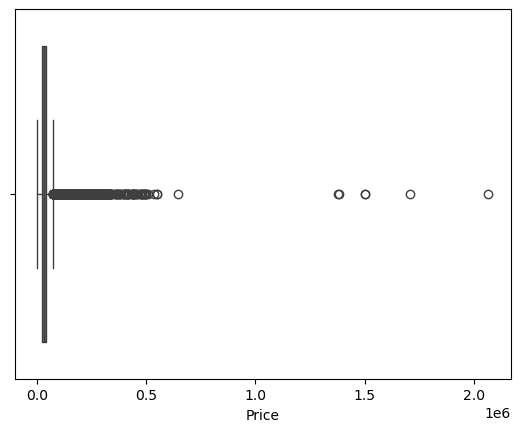

In [72]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

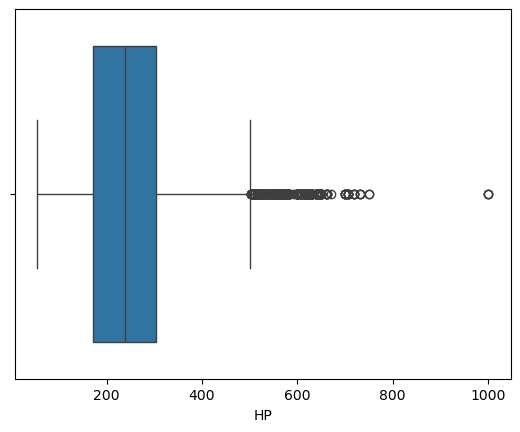

In [73]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

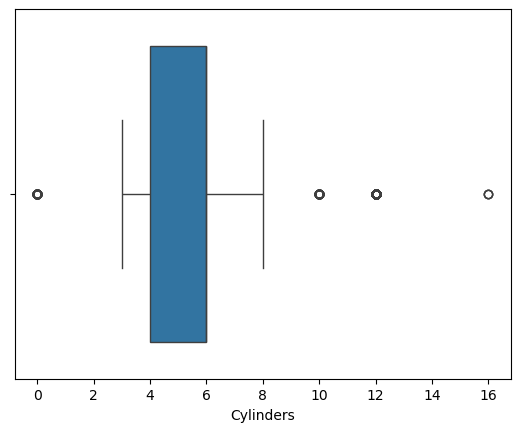

In [74]:
sns.boxplot(x=df['Cylinders'])

In [76]:
# Option 1: Calculate quantiles only for numeric columns
numeric_columns = df.select_dtypes(include=[np.number])
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
print("IQR for numeric columns:")
print(IQR)

IQR for numeric columns:
Year                   9.0
HP                   132.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1460.0
Price              21433.0
dtype: float64


In [78]:
# Apply outlier removal only to numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8623, 16)

## Data Visualization

### Number of cars by make

Text(0.5, 0, 'Make')

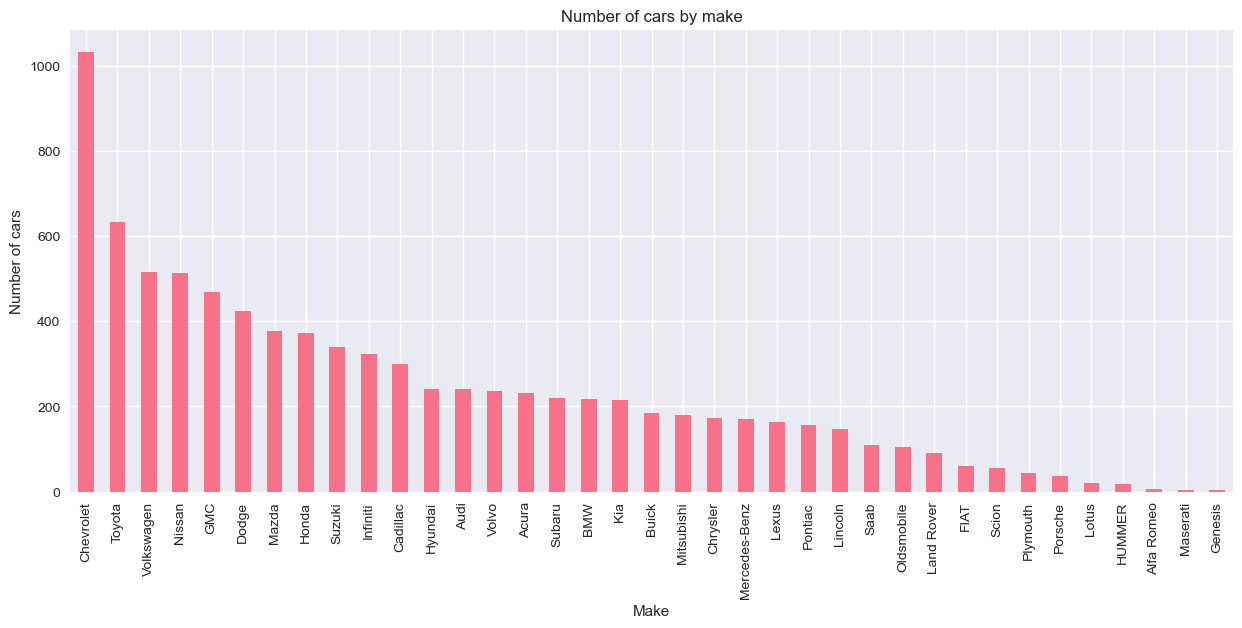

In [153]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(15,6))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')

* Chevrolet dominates the dataset with over 1,000 cars, significantly outpacing all other manufacturers
* The top 5 brands (Chevrolet, Toyota, Volkswagen, Nissan, GMC) represent a substantial portion of the total vehicles
* There's a steep decline from the top manufacturers to mid-tier brands, indicating market concentration
* The distribution follows a typical "long tail" pattern - few brands dominate while many others have smaller market shares
* Mix of American (Chevrolet, GMC, Ford), Japanese (Toyota, Nissan, Honda), and European (Volkswagen) manufacturers in the top ranks
* The dataset appears to reflect the North American automotive market given the prominence of American brands
* With 40+ different makes represented, the dataset shows good diversity in vehicle brands
* The exponential decline suggests this could be sales data, inventory data, or used car listings where popular brands naturally appear more frequently

### HP vs Price

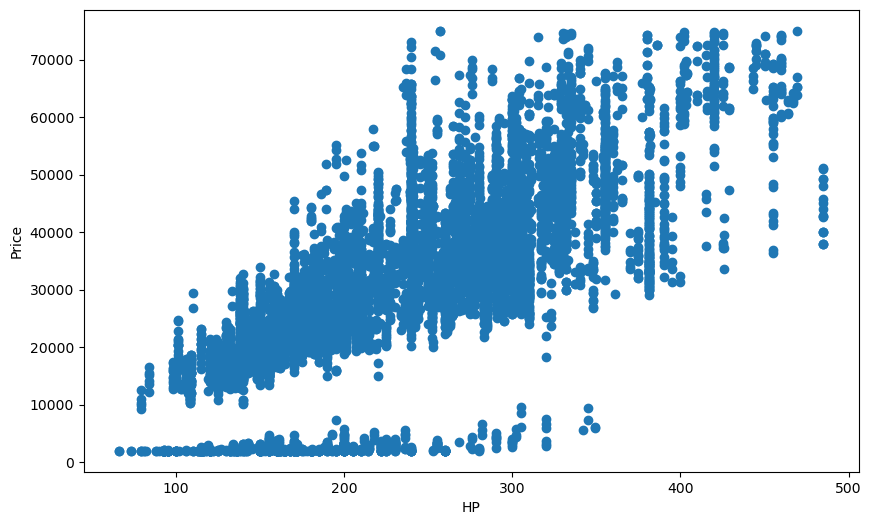

In [81]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

* There's a clear positive relationship between horsepower and price - as HP increases, car prices generally increase as well.
* The relationship isn't perfectly linear. At lower HP ranges (under 200), prices are more tightly clustered and increase gradually. Above 300 HP, there's much more price variation and steeper increases.
* Low HP cars (50-150): Prices mostly range from $ 10K-30K
  
* High HP cars (300-500): Prices can range from $20K , all the way up to $70K+
* Cars with 300+ horsepower command significantly higher prices, likely representing sports cars, luxury vehicles, and high-performance models.
* Outliers: There are some interesting outliers - a few high-HP cars with relatively low prices (possibly older performance cars) and some lower-HP cars with higher prices (potentially luxury brands where other factors drive value).

In [83]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### Price Distribution

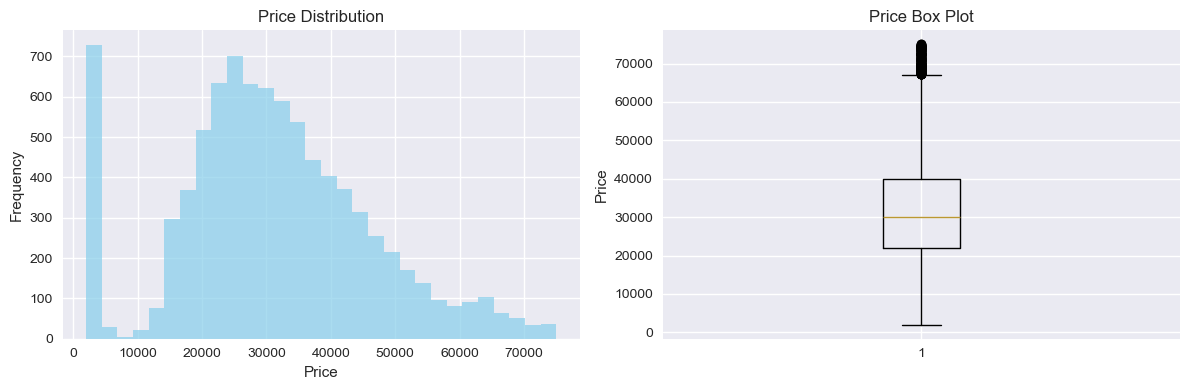

In [87]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['Price'], bins=30, alpha=0.7, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['Price'])
plt.title('Price Box Plot')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

* The majority of cars are priced below $40,000, suggesting this dataset represents mainstream consumer vehicles rather than luxury markets.
   
* The box plot reveals the median price is approximately $27,000-$30,000, with the interquartile range spanning roughly $20,000-$40,000.
* Several high-priced outliers extend beyond $60,000, likely representing luxury or specialty vehicles that command premium prices.
* The concentration of vehicles in the lower-to-mid price range indicates good market accessibility for average consumers.

### Engine Types 

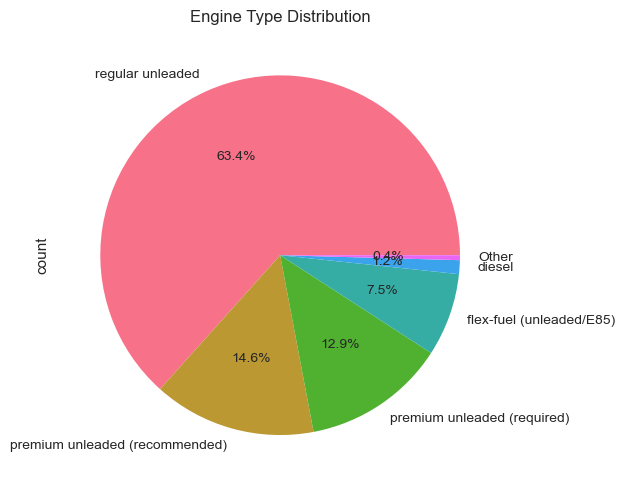

In [154]:
plt.figure(figsize=(15, 5))

# Calculate value counts and percentages
engine_counts = df['Engine Fuel Type'].value_counts()
engine_pct = engine_counts / engine_counts.sum() * 100

# Group categories with less than 1% into "Other"
threshold = 1.0  # 1% threshold
small_categories = engine_pct[engine_pct < threshold]
large_categories = engine_pct[engine_pct >= threshold]

# Create new series with "Other" category
if len(small_categories) > 0:
    other_count = small_categories.sum()
    # Add "Other" to large categories
    large_categories['Other'] = other_count
    plot_data = large_categories
else:
    plot_data = large_categories

# Create the pie chart
plot_data.plot(kind='pie', autopct='%1.1f%%')
plt.title('Engine Type Distribution')
plt.tight_layout()
plt.show()

* Regular unleaded gasoline makes up approximately 63.4% of all vehicles - nearly two-thirds of the dataset. This reflects the widespread use of conventional gasoline engines in the automotive market.
* Premium unleaded (both recommended at 14.6% and required at 12.9%) accounts for about 27.5% combined. This indicates a significant portion of vehicles are higher-performance or luxury models that require or benefit from premium fuel.
* Alternative Fuels are Minimal:
    * Diesel represents only 5.4% of vehicles
	* Flex-fuel (E85) is just 2.0%
	* Other fuel types are grouped together as "Other" at 1.4%

### Transmission Type Distribution

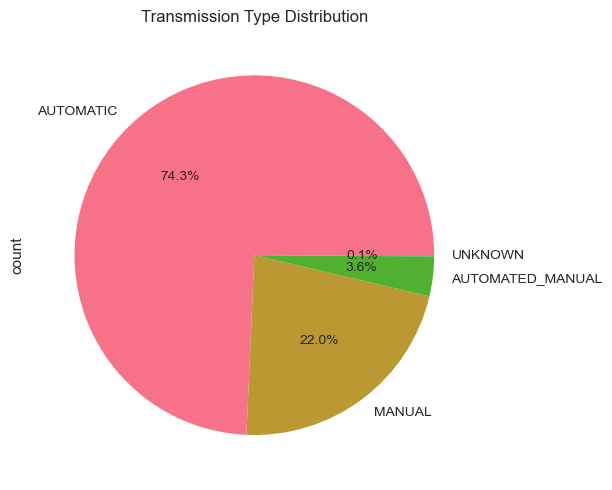

In [147]:
plt.figure(figsize=(15, 5))
df['Transmission'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Transmission Type Distribution')
plt.tight_layout()
plt.show()

1. Automatic transmissions make up the vast majority at 74.3% of all vehicles in the dataset, indicating a strong preference for automatic cars in this market.

2. Manual transmissions represent only 23.0% of vehicles, showing they're significantly less common than automatics.

3. The "Unknown/Automated_Manual" category at 2.7% likely represents either:
    * CVT (Continuously Variable Transmission) vehicles
	* Automated manual transmissions (like paddle shifters)
	
4. This distribution suggests the dataset likely represents a market where:
    * Consumers prefer convenience (automatic transmissions)
	* The data might be from regions like North America where automatics are more popular
	* Manual transmissions are becoming increasingly niche

### Market Category Distribution

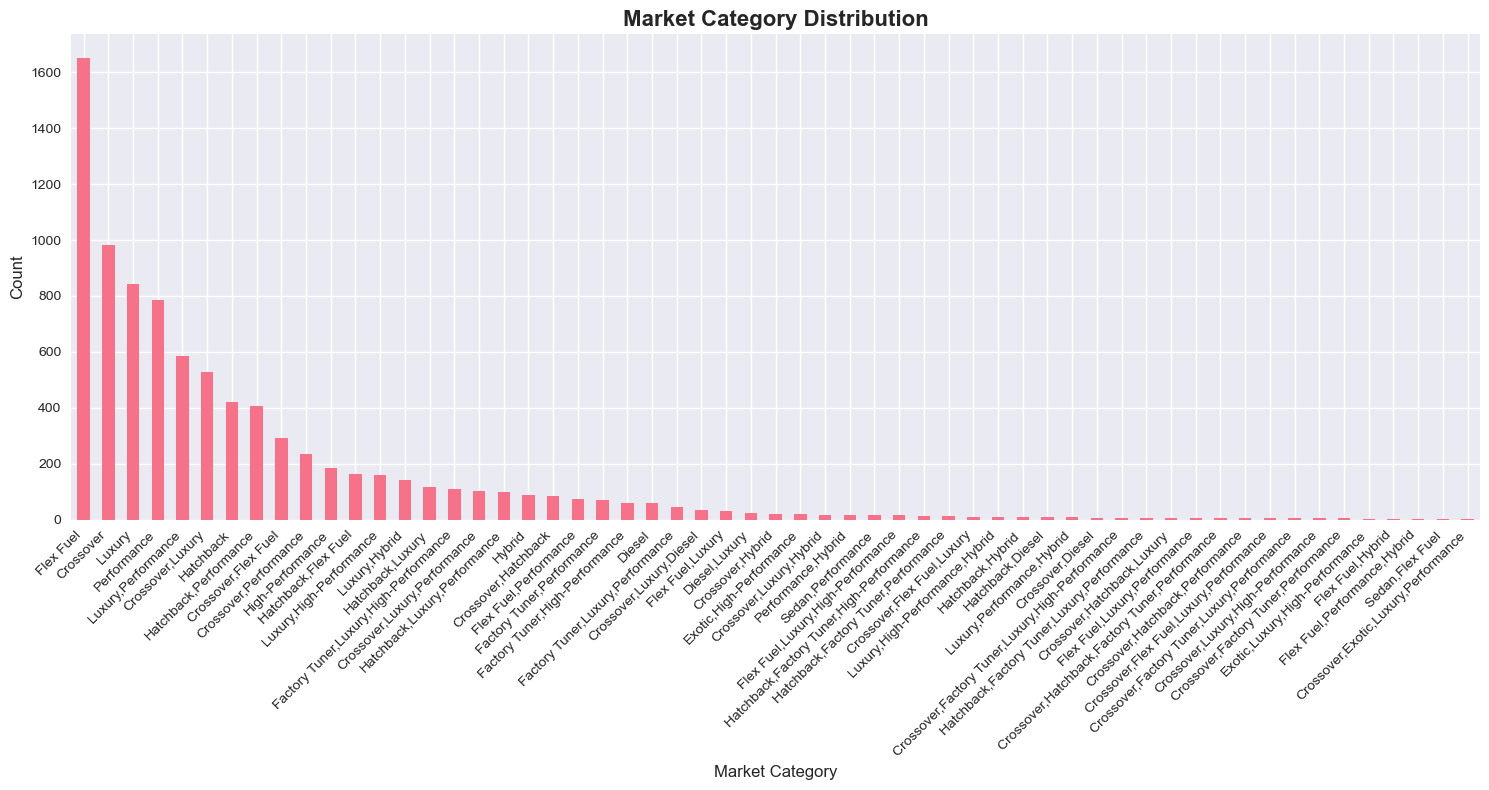

In [155]:
plt.figure(figsize=(15, 8))
df['Market Category'].value_counts().plot(kind='bar')
plt.title('Market Category Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Market Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Crossover vehicles dominate the market by a significant margin (~800+ units), representing the most popular category
* Luxury vehicles come second (~700+ units), indicating a strong premium market segment
* High-Performance vehicles rank third (~600+ units), showing consumer interest in sporty options
* The distribution follows a steep decline pattern - the top 3-4 categories contain the majority of vehicles
* There's a long tail of niche categories with very low representation (under 100 units each)
* Many specialized categories (like "Factory Tuner," "Exotic," "Diesel") have minimal market presence
* The market is heavily concentrated in mainstream categories (Crossover, Luxury, Performance)
* Niche markets exist but represent small opportunities
* Crossover vehicles are clearly the market leader, likely reflecting consumer preferences for versatility and practicality

### Vehicle Size Distribution

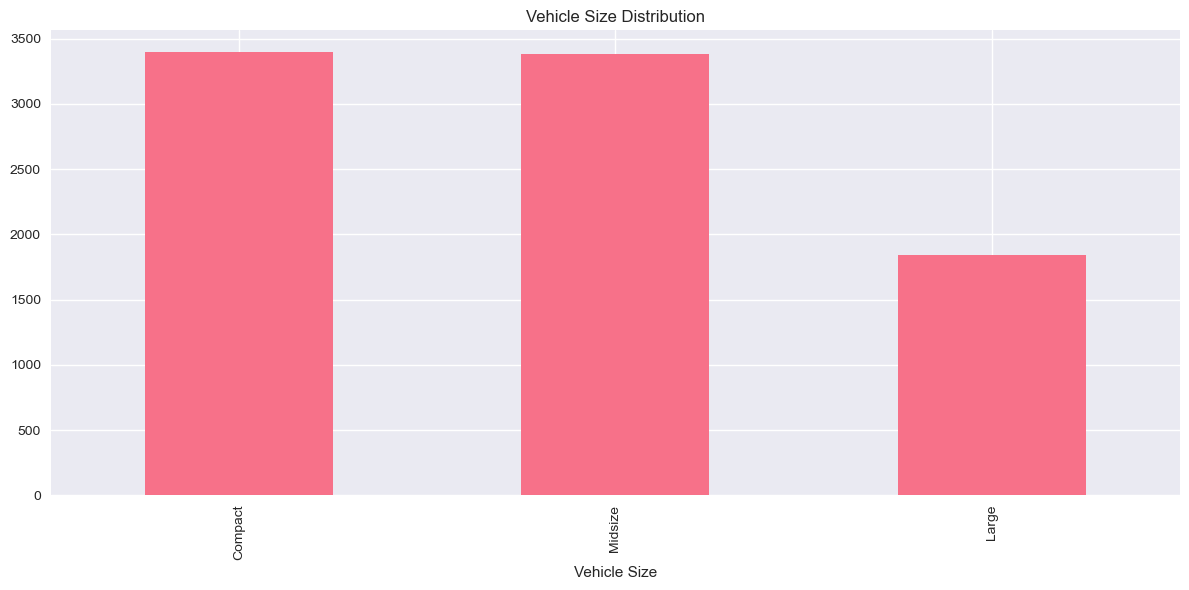

In [139]:
plt.figure(figsize=(12, 6))
df['Vehicle Size'].value_counts().plot(kind='bar')
plt.title('Vehicle Size Distribution')
plt.tight_layout()
plt.show()

* Compact and Midsize Dominance: Compact and Midsize vehicles have nearly identical counts (both around 2,700-2,800 vehicles), making up the vast majority of the dataset.
* Market Preference: The high representation of Compact and Midsize vehicles suggests these are the most popular categories, likely due to their balance of fuel efficiency, affordability, and practicality.
* Large Vehicle Niche: Large vehicles represent significantly fewer entries (approximately 1,800), indicating they serve a more specialized market segment.
* Dataset Balance: The distribution shows a reasonable representation across categories, though it's weighted toward smaller, more fuel-efficient vehicle types.

This distribution pattern is typical of real-world automotive markets where consumers favor smaller, more economical vehicles over larger ones, except for specific use cases requiring larger capacity or towing capability.

### Features vs Price

Text(0.5, 1.0, 'Highway MPG vs Price')

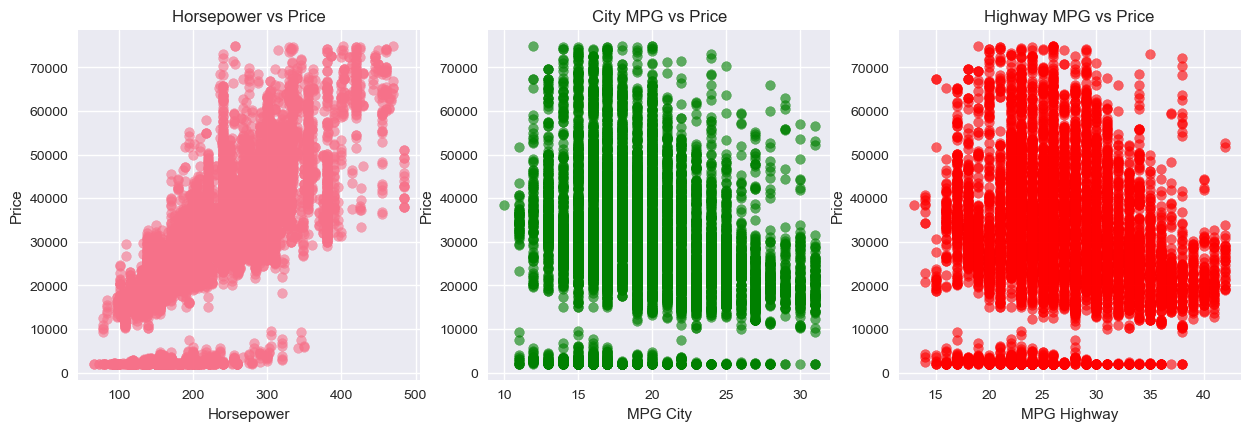

In [117]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.scatter(df['HP'], df['Price'], alpha=0.6)
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Horsepower vs Price')

plt.subplot(2, 3, 2)
plt.scatter(df['MPG-C'], df['Price'], alpha=0.6, color='green')
plt.xlabel('MPG City')
plt.ylabel('Price')
plt.title('City MPG vs Price')

plt.subplot(2, 3, 3)
plt.scatter(df['MPG-H'], df['Price'], alpha=0.6, color='red')
plt.xlabel('MPG Highway')
plt.ylabel('Price')
plt.title('Highway MPG vs Price')

Horsepower & Price Relationship:
* Clear positive correlation - higher horsepower generally means higher price
* Most cars cluster in the 100-300 HP range with prices under $40,000
* Premium vehicles with 300+ HP command significantly higher prices

Fuel Efficiency Paradox:
* Surprising finding: Both city and highway MPG show negative correlations with price
* Cars with better fuel economy (higher MPG) tend to be less expensive
* This suggests luxury/performance vehicles prioritize power over efficiency

Market Segmentation:
* The data reveals two distinct market segments:
* Economy cars: High MPG (25-35), lower HP, budget-friendly prices
* Luxury/Performance cars: Lower MPG (15-25), high HP, premium pricing

Business Implications:

* Consumers appear willing to pay more for power than efficiency
* There's a clear trade-off between performance and fuel economy in the market
* The data suggests different value propositions for different customer segments

This analysis reveals that in the car market, performance characteristics (horsepower) are more strongly associated with premium pricing than efficiency features (MPG).

### Number of Distributions

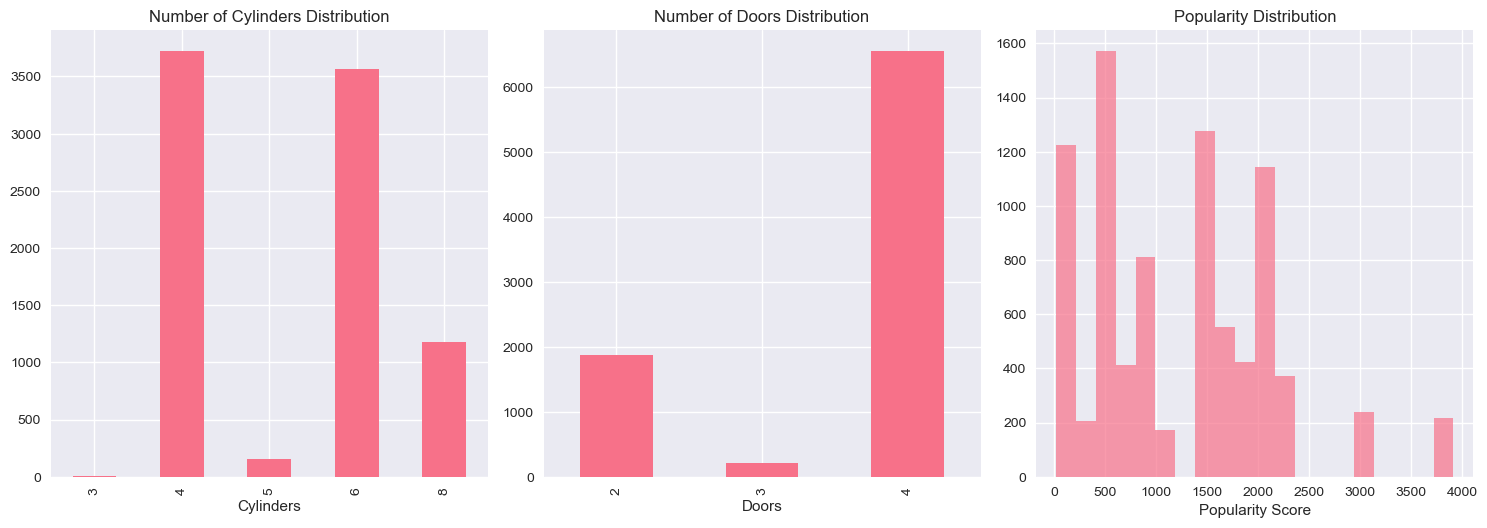

In [119]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 4)
df['Cylinders'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Cylinders Distribution')
plt.xlabel('Cylinders')

plt.subplot(2, 3, 5)
df['Number of Doors'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Doors Distribution')
plt.xlabel('Doors')

plt.subplot(2, 3, 6)
df['Popularity'].hist(bins=20, alpha=0.7)
plt.title('Popularity Distribution')
plt.xlabel('Popularity Score')
plt.tight_layout()
plt.show()

Cylinder Distribution:
* Most cars have either 4 or 6 cylinders (roughly equal proportions at ~3,500 cars each)
* Very few cars have 3, 5, or 8+ cylinders, indicating these are specialty/rare configurations
* This suggests the dataset focuses on mainstream consumer vehicles

Door Configuration:
* 4-door cars vastly outnumber 2-door cars (approximately 6,000+ vs 2,000)
* This reflects market preference for practical family vehicles over sports cars/coupes

Popularity Distribution:
* Shows a right-skewed distribution with most cars having lower popularity scores
* Peak popularity is around 1,000-1,500 range
* Very few cars achieve high popularity scores (3,000+), suggesting true standout vehicles are rare
* This indicates most cars perform moderately in the market with only exceptional models gaining widespread appeal

### Fuel Efficiency vs Price

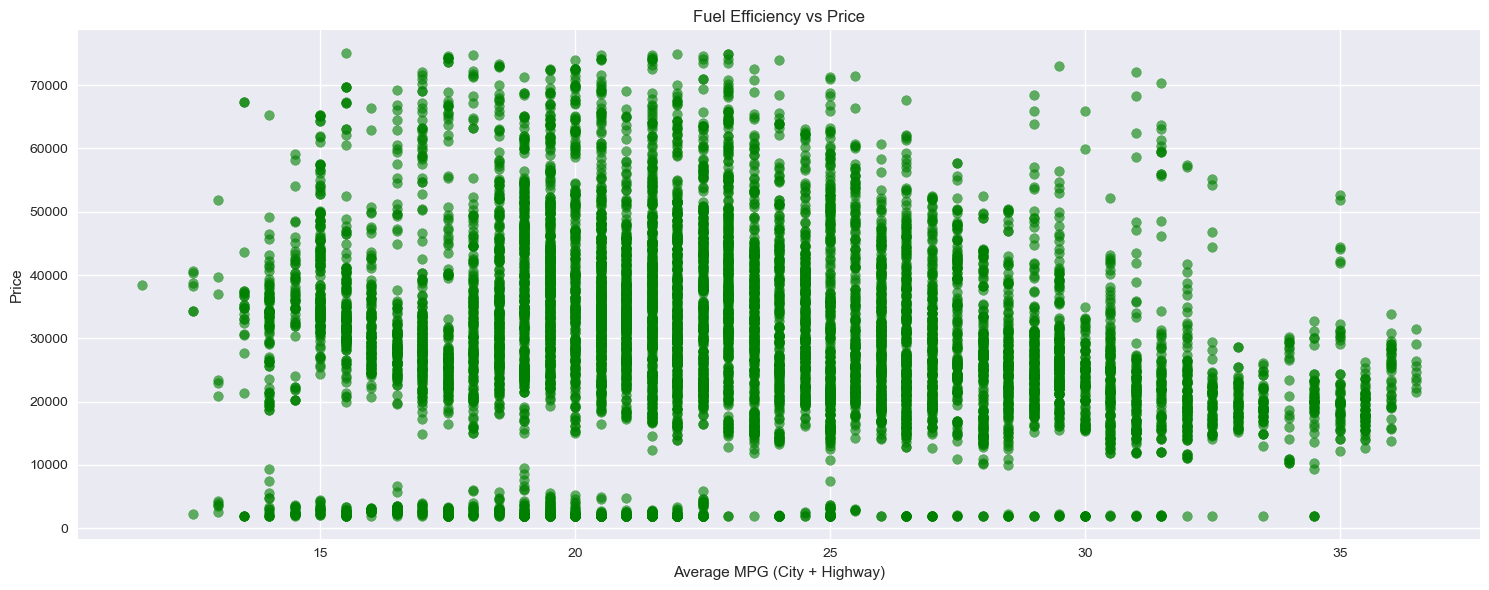

In [141]:
plt.figure(figsize=(15, 6))
efficiency = (df['MPG-C'] + df['MPG-H']) / 2
plt.scatter(efficiency, df['Price'], alpha=0.6, color='green')
plt.xlabel('Average MPG (City + Highway)')
plt.ylabel('Price')
plt.title('Fuel Efficiency vs Price')
plt.tight_layout()
plt.show()

* There's a clear negative correlation between fuel efficiency and price - as MPG increases, car prices generally decrease.
* Most cars are priced between $10,000-$50,000, with some luxury vehicles reaching $60,000+.

* The majority of cars cluster around 15-25 MPG average efficiency.
* High-priced vehicles (above $40,000) tend to have lower fuel efficiency (15-20 MPG), likely representing luxury or performance cars that prioritize power over efficiency.
* Cars with higher fuel efficiency (25-35 MPG) are predominantly in the lower price range ($10,000-$30,000), making them attractive for budget-conscious, eco-friendly buyers.
* The data shows clear market segmentation - lux

### Top 10 Most Expensive Car Makes

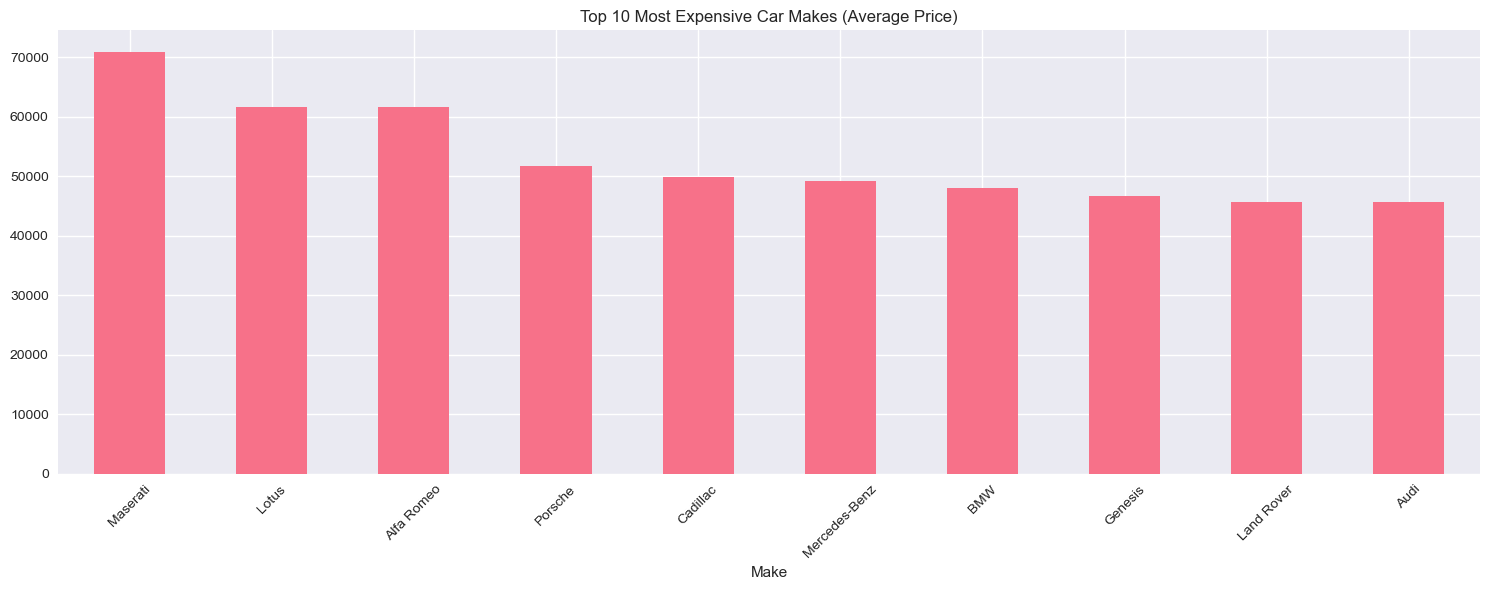

In [160]:
plt.figure(figsize=(15, 6))
df.groupby('Make')['Price'].mean().nlargest(10).plot(kind='bar')
plt.title('Top 10 Most Expensive Car Makes (Average Price)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Maserati leads as the most expensive brand with an average price around $60,000
* Lexus and Alfa Romeo follow closely, both averaging approximately $58,000-59,000
* These three brands represent the ultra-luxury segment
* There's a clear drop-off after the top 3, with Porsche averaging around $52,000
* Cadillac, Mercedes-Benz, BMW, Genesis, Land Rover, and Audi form a consistent luxury tier
* These brands cluster between $45,000-50,000, showing relatively similar pricing strategies
* The gap between luxury brands is relatively small (about $15,000 range), suggesting competitive pricing within the premium segment
* All top 10 brands are well-established luxury/premium manufacturers, indicating strong brand value correlation with pricing
* No mainstream brands appear in the top 10, highlighting clear market segmentation between luxury and mass-market vehicles

### Correlation Heatmap

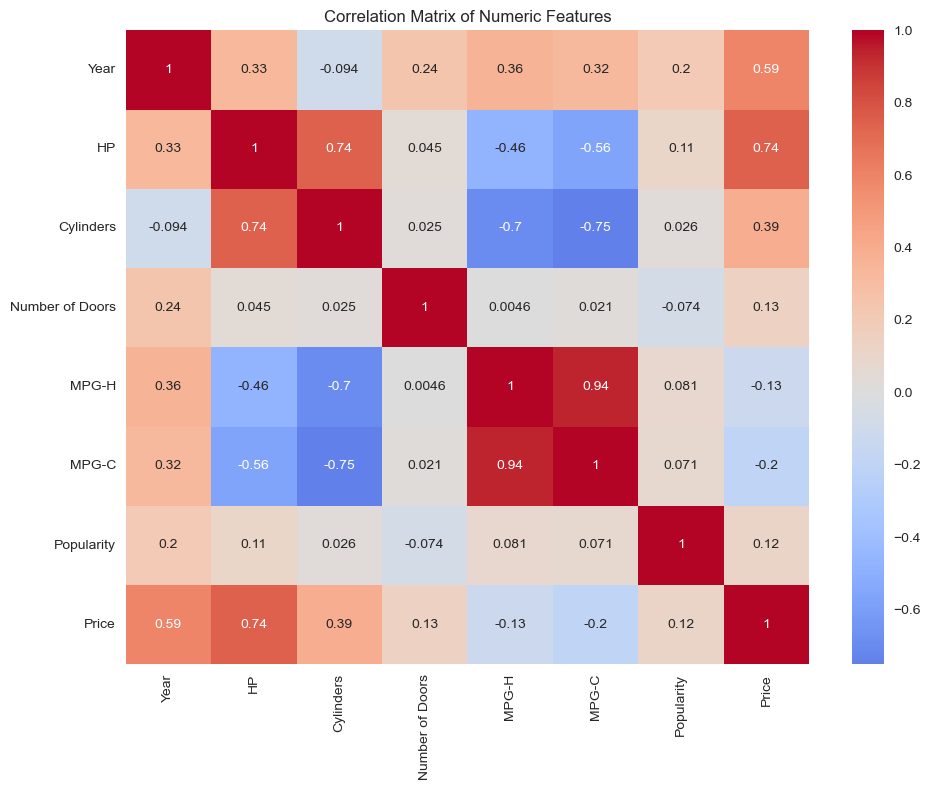

In [102]:
numeric_cols = ['Year', 'HP', 'Cylinders', 'Number of Doors', 'MPG-H', 'MPG-C', 'Popularity', 'Price']
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

Strong Positive Correlations:
* HP and Cylinders (0.74) - More cylinders typically mean more horsepower
* MPG-H and MPG-C (0.94) - Highway and city fuel efficiency are highly related
* HP and Price (0.74) - Higher horsepower cars tend to be more expensive

Strong Negative Correlations:
* HP and MPG-H (-0.46), HP and MPG-C (-0.46) - More powerful cars consume more fuel
* Cylinders and MPG-H (-0.7), Cylinders and MPG-C (-0.75) - More cylinders lead to worse fuel economy

observations:
* Year shows weak correlations with most features, suggesting car characteristics haven't changed dramatically over time in this dataset
* Popularity has minimal correlation with technical specs, indicating consumer preferences aren't solely based on performance metrics
* Price correlates moderately with HP (0.74) but weakly with fuel efficiency, showing performance matters more than economy for pricin

### Price Analysis by Categories 

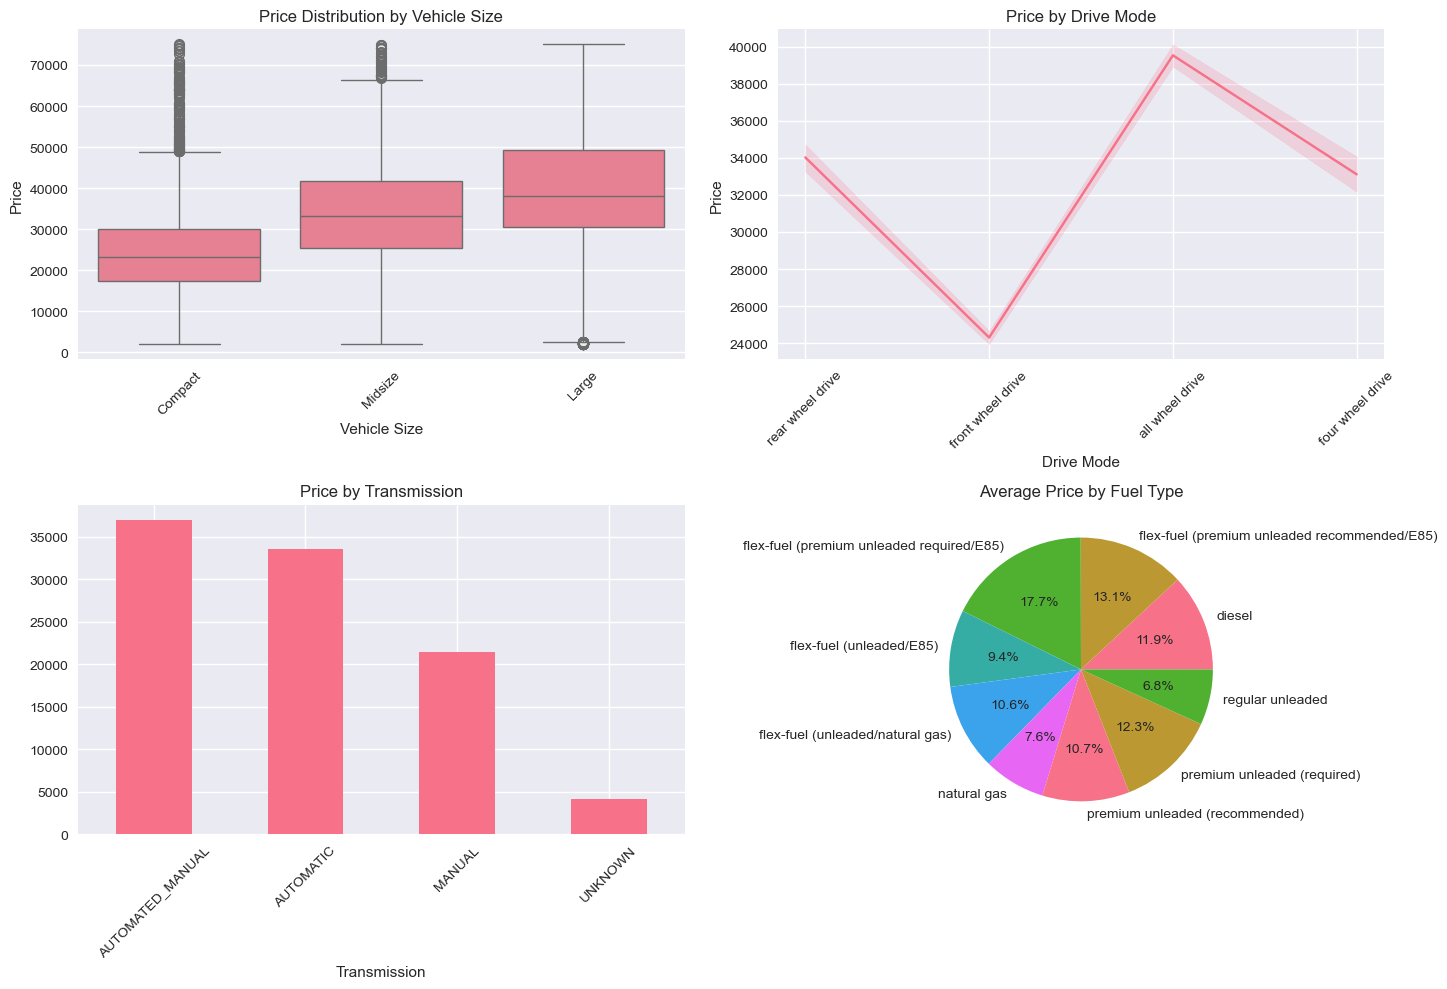

In [165]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
# Box plot instead of scatter plot for better category comparison
sns.boxplot(data=df, x='Vehicle Size', y='Price', ax=plt.gca())
plt.title('Price Distribution by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
import seaborn as sns
sns.lineplot(data=df, x='Drive Mode', y='Price', ax=plt.gca())
plt.title('Price by Drive Mode')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
df.groupby('Transmission')['Price'].mean().plot(kind='bar', ax=plt.gca())
plt.title('Price by Transmission')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
fuel_type_avg = df.groupby('Engine Fuel Type')['Price'].mean()
plt.pie(fuel_type_avg.values, labels=fuel_type_avg.index, autopct='%1.1f%%')
plt.title('Average Price by Fuel Type')

plt.tight_layout()
plt.show()

Diagram 1: Price Distribution by Vehicle Size
* Compact vehicles have the lowest median price (around $25,000) with a relatively narrow price range
* Midsize vehicles show a moderate price range with median around $35,000
* Large vehicles have the highest prices with median around $45,000 and the widest price distribution

Diagram 2: Price by Drive Mode
* Rear-wheel drive vehicles have the lowest average price (around $24,000)
* Front-wheel drive shows moderate pricing (around $30,000)
* All-wheel drive vehicles command the highest prices (around $38,000)
* Four-wheel drive falls in between at approximately $35,000

Diagram 3: Price by Transmission 
* Continuously Variable (CVT) has the highest average price at around $40,000
* Automatic transmissions follow closely at approximately $35,000
* Manual transmissions show significantly lower average prices at around $20,000
* Unknown transmission category has very low representation and price

Diagram 4: Average Price by Fuel Type 
* The chart includes multiple fuel categories including premium unleaded, regular unleaded, diesel, natural gas, and flex-fuel options
* Premium unleaded appears to have significant representation
	
Overall Insights:
1. There's a clear positive correlation between vehicle size and price - larger vehicles consistently cost more than compact ones.
2. All-wheel and four-wheel drive systems command higher prices, likely due to their complexity and capability advantages.
3. CVT and automatic transmissions are priced higher than manual transmissions, reflecting consumer preference for convenience and modern technology.
4. The market shows significant diversity in fuel types, indicating various consumer preferences and environmental considerations.
5. The data reveals clear market segmentation where premium features (larger size, advanced drive systems, automatic transmissions) correlate with higher pricing.
6. Manual transmission and rear-wheel drive vehicles appear to be positioned in the value segment of the market.

### Number of Cars by Year

Text(0, 0.5, 'Count')

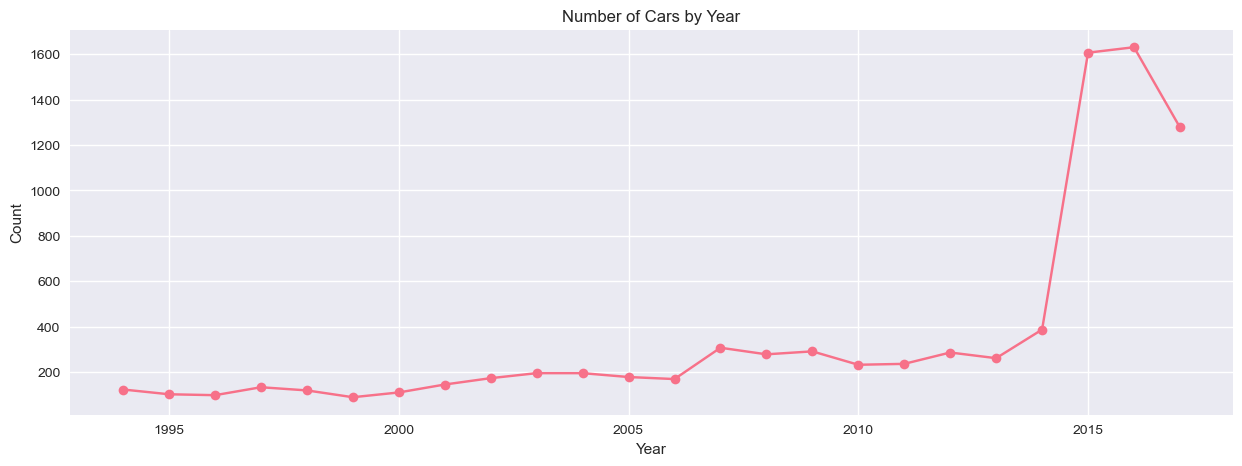

In [149]:
plt.figure(figsize=(15, 5))
df['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Count')

* Stable baseline (1995-2010): Car counts remained relatively low and consistent, hovering around 200-400 cars per year
* Dramatic surge (2015-2017): There's a sharp exponential increase, peaking around 2016-2017 with nearly 1,800 cars
* Recent decline (2017-present): A notable drop after the peak, settling around 1,200 cars

### Top 10 Most Popular Car Makes

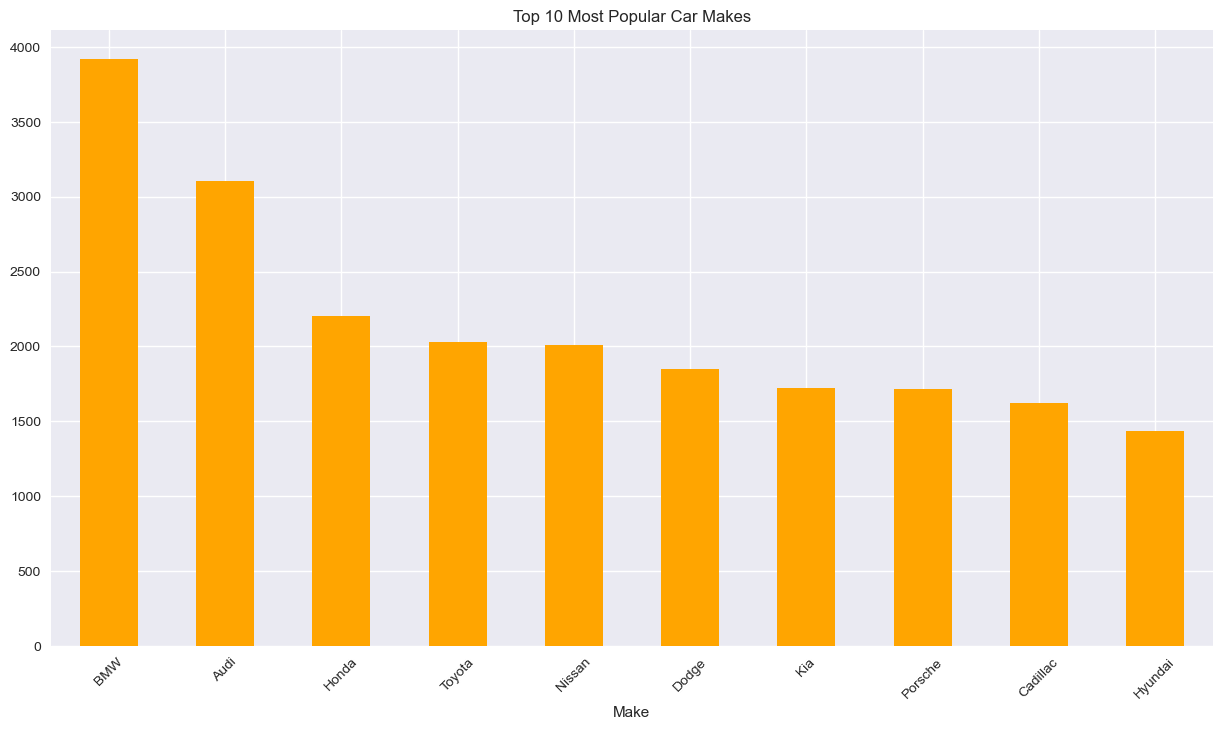

In [166]:
plt.figure(figsize=(15, 8))
df.groupby('Make')['Popularity'].mean().nlargest(10).plot(kind='bar', color='orange')
plt.title('Top 10 Most Popular Car Makes')
plt.xticks(rotation=45);

* BMW dominates with the highest popularity score (~4000), establishing itself as the clear market leader
* Audi follows as a strong second (~3100), showing German luxury brands lead the popularity rankings
* There's a significant gap between the top 2 (BMW, Audi) and the rest of the field
* The remaining 8 brands cluster more closely together (1400-2200 range), suggesting a competitive middle tier
* German luxury brands (BMW, Audi) dominate the top positions
* The popularity scores show a gradual decline rather than dramatic drops, indicating a relatively stable brand preference hierarchy
* The top 10 brands show varied popularity levels, suggesting consumers have diverse preferences but clear favorites
* The substantial lead of BMW indicates strong brand loyalty or market positioning advantages

### Average Price by Year

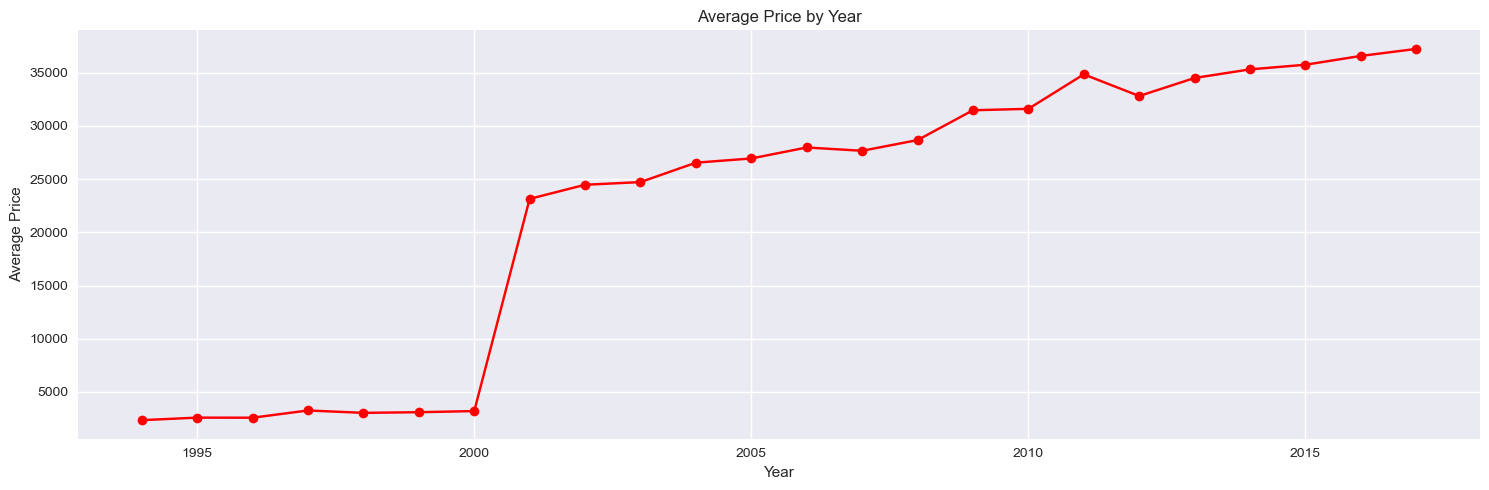

In [146]:
plt.figure(figsize=(15, 5))
yearly_avg_price = df.groupby('Year')['Price'].mean()
yearly_avg_price.plot(kind='line', marker='o', color='red')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

* The most striking feature is a sharp vertical increase around the year 2000, where prices jumped from roughly $2,000-3,000 to about $23,000 - representing nearly a 10x increase.
* From 1995-2000, prices remained relatively flat and low, hovering around $2,000-3,000 with minimal variation.

* After the initial spike, there's been consistent upward growth from 2000 onwards, with prices rising from ~$23,000 to over $40,000 by 2018.
* There are some small fluctuations in the 2010-2015 period, including a slight dip around 2013, but the overall trend remains upward.
* The growth rate appears to have accelerated in the final years shown, with steeper increases from 2015-2018."

### Price Distribution: Luxury vs Regular Cars

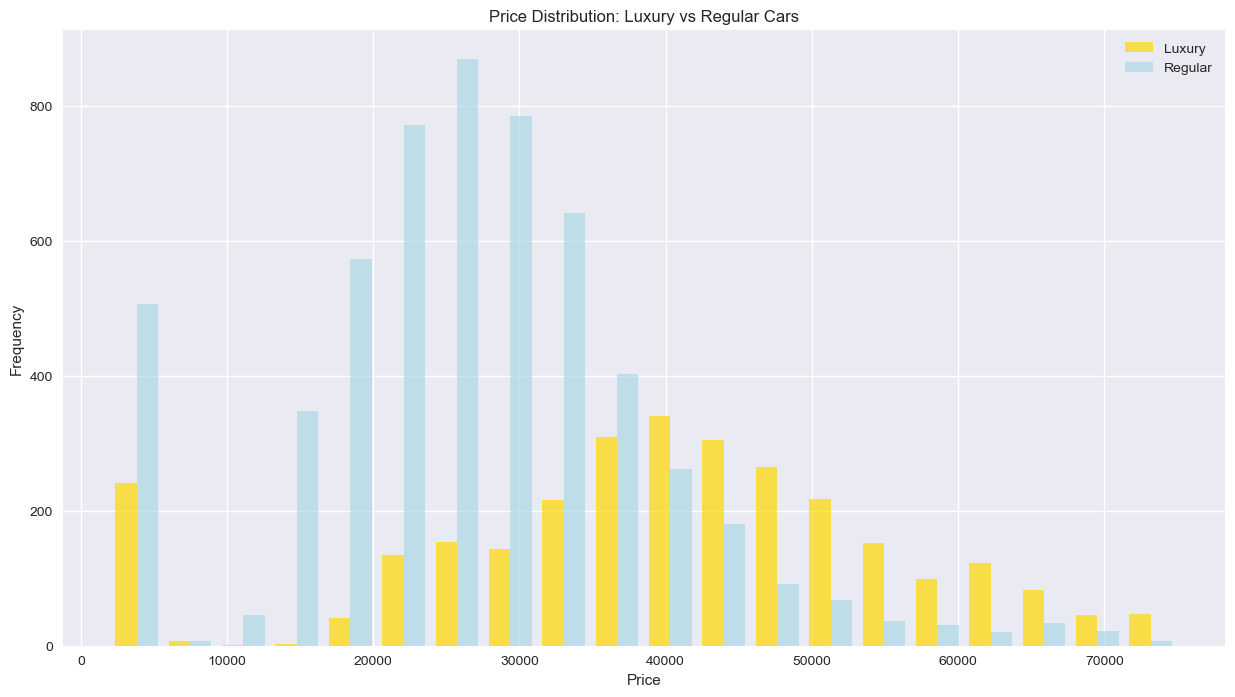

In [152]:
plt.figure(figsize=(15, 8))
luxury_cars = df[df['Market Category'].str.contains('Luxury', na=False)]
regular_cars = df[~df['Market Category'].str.contains('Luxury', na=False)]
plt.hist([luxury_cars['Price'], regular_cars['Price']], bins=20, alpha=0.7, 
         label=['Luxury', 'Regular'], color=['gold', 'lightblue'])
plt.title('Price Distribution: Luxury vs Regular Cars')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

* Regular cars dominate the lower price ranges (under $30,000)

* Luxury cars show higher concentrations in mid-to-high price ranges ($30,000-$50,000)

* Regular cars have significantly higher frequencies overall, indicating they make up the majority of the dataset
* The highest peak for regular cars is around 800+ frequency in the lower price ranges
* Regular cars: Heavily concentrated in the $10,000-$25,000 range with a sharp decline after $30,000

* Luxury cars: More evenly distributed across higher price points, with notable presence in the $35,000-$45,000 range

* There's a clear separation where regular car frequency drops dramatically (around $30,000) while luxury car presence increases, suggesting distinct market segments
* Luxury cars maintain consistent presence even at higher price points where regular cars become rare, confirming their premium market positioning

# Key Insights

* The data clearly shows a bimodal distribution with two distinct market segments
* Regular cars dominate the lower price ranges (under $30,000) with very high frequencies

* Luxury cars are concentrated in the higher price ranges ($30,000-$50,000) with lower frequencies
* Peak concentration: Regular cars show maximum frequency around the $20,000-$25,000 range
* Sharp decline: There's a dramatic drop in frequency after $30,000, marking the transition from regular to luxury segments

* Luxury plateau: Luxury cars show more even distribution across the $30,000-$45,000 range with notable presence in mid-tier luxury pricing

* Regular cars represent the majority of the dataset with frequencies reaching 600+ units
* Luxury cars have significantly lower volumes but maintain consistent presence across higher price points
* The $10,000-$25,000 range shows the highest market activity

# Overall Conclusions

* The automotive market shows distinct regular and luxury segments with minimal overlap around the $30,000 price point.

* Regular cars compete on volume in the affordable segment, while luxury cars focus on higher-margin, lower-volume sales.

* The concentration of regular cars in lower price ranges suggests strong market focus on affordability and mass market appeal.

* Despite lower volumes, luxury cars maintain consistent presence across their price range, indicating stable demand in premium segments.

* The sharp frequency drop after $30,000 indicates this as a critical psychological price barrier separating mass market from luxury consumers.